# Import required libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Here we can see The dataset contains the details of Census Income this dataset is 32560 rows and 15 columns including 1 target variables Income where we need to predict the income.

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Exploratory Data Analysis(EDA)

In [9]:
df.shape

(32560, 15)

- This dataset contains 32560 rows and 15 columns.

In [11]:
#checking the type of dataset
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

- We can see the dataset contains different features with different data types. There are two types of data namely object type and int64 data type. We will take care of the object datatype using encoding techniques later.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- Using the info() function a short summary of the census income dataframe is made and print the information about the       dataframe including the index dtypes and column dtypes, non-null values and memory usage.

In [15]:
#checking number of unique values in each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

- From the above cell we can check the no. of unique values present in each columns.
  
  Here the columns target variable and sex contains 2 unique values. 

In [5]:
#checking the count of the income
df['Income'].value_counts()

Income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64

- There is an two categories less than & equal to the 50k income and greater than 50k income.

In [7]:
df['Sex'].value_counts()

Sex
 Male      21789
 Female    10771
Name: count, dtype: int64

- In the Sex column male is 21789 and female is 10771

In [8]:
df['Native_country'].value_counts()

Native_country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

There is an maximum number people belong to the united nation.

In [9]:
df['Workclass'].value_counts()

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

- So, Here we assume that there are Most of the people work in private sector.

In [10]:
df['Occupation'].value_counts()

Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

- So here we can see there are maximum number of people worked as the prof-specialty, craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct and minimum number of people worked as the ?,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv and Armed-Forces

In [30]:
#Dropping irrelavant columns
df=df.drop(['Fnlwgt','Education_num'],axis=1,inplace=True)

In [9]:
#checking the null values in the data frame
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- We can see there are no null null values are present in this dataset.

<Axes: >

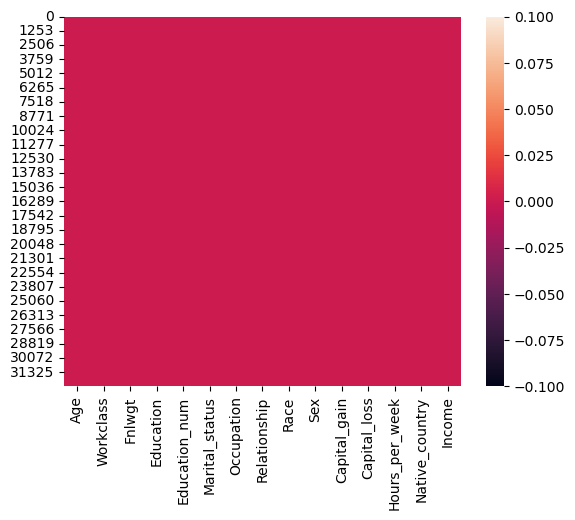

In [10]:
# Checking the null values by the heatmap
sns.heatmap(df.isnull())

In [11]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative values are present.

From the above description we can observe the following-
 1) The counts of all the columns are same which means there are no missing values in the dataset.
 2)The mean vlaue is greater than the median(50%) in Age,Fnlwgt,Capital_gain and Capital_loss which means the data is skewed to right in these column.
 3) By summarizing the data we can observe there is a huge difference between 75% and max hence there are outliers present in the data.

In [5]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [6]:
#checking the list of counts of income
df['Income'].value_counts()

Income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64

In [7]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- There are no null values in this dataset

In [8]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("/n")

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
/n
Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
/n
Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64
/n
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool    

- We observe that in every column values are repeted so much time.

In [16]:
#checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print (categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


- So these are the categorical columns

In [17]:
#Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print (numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


- In above cell all the columns are numerical present in the dataset.

# Data Visualization 

# Univariate Analysis

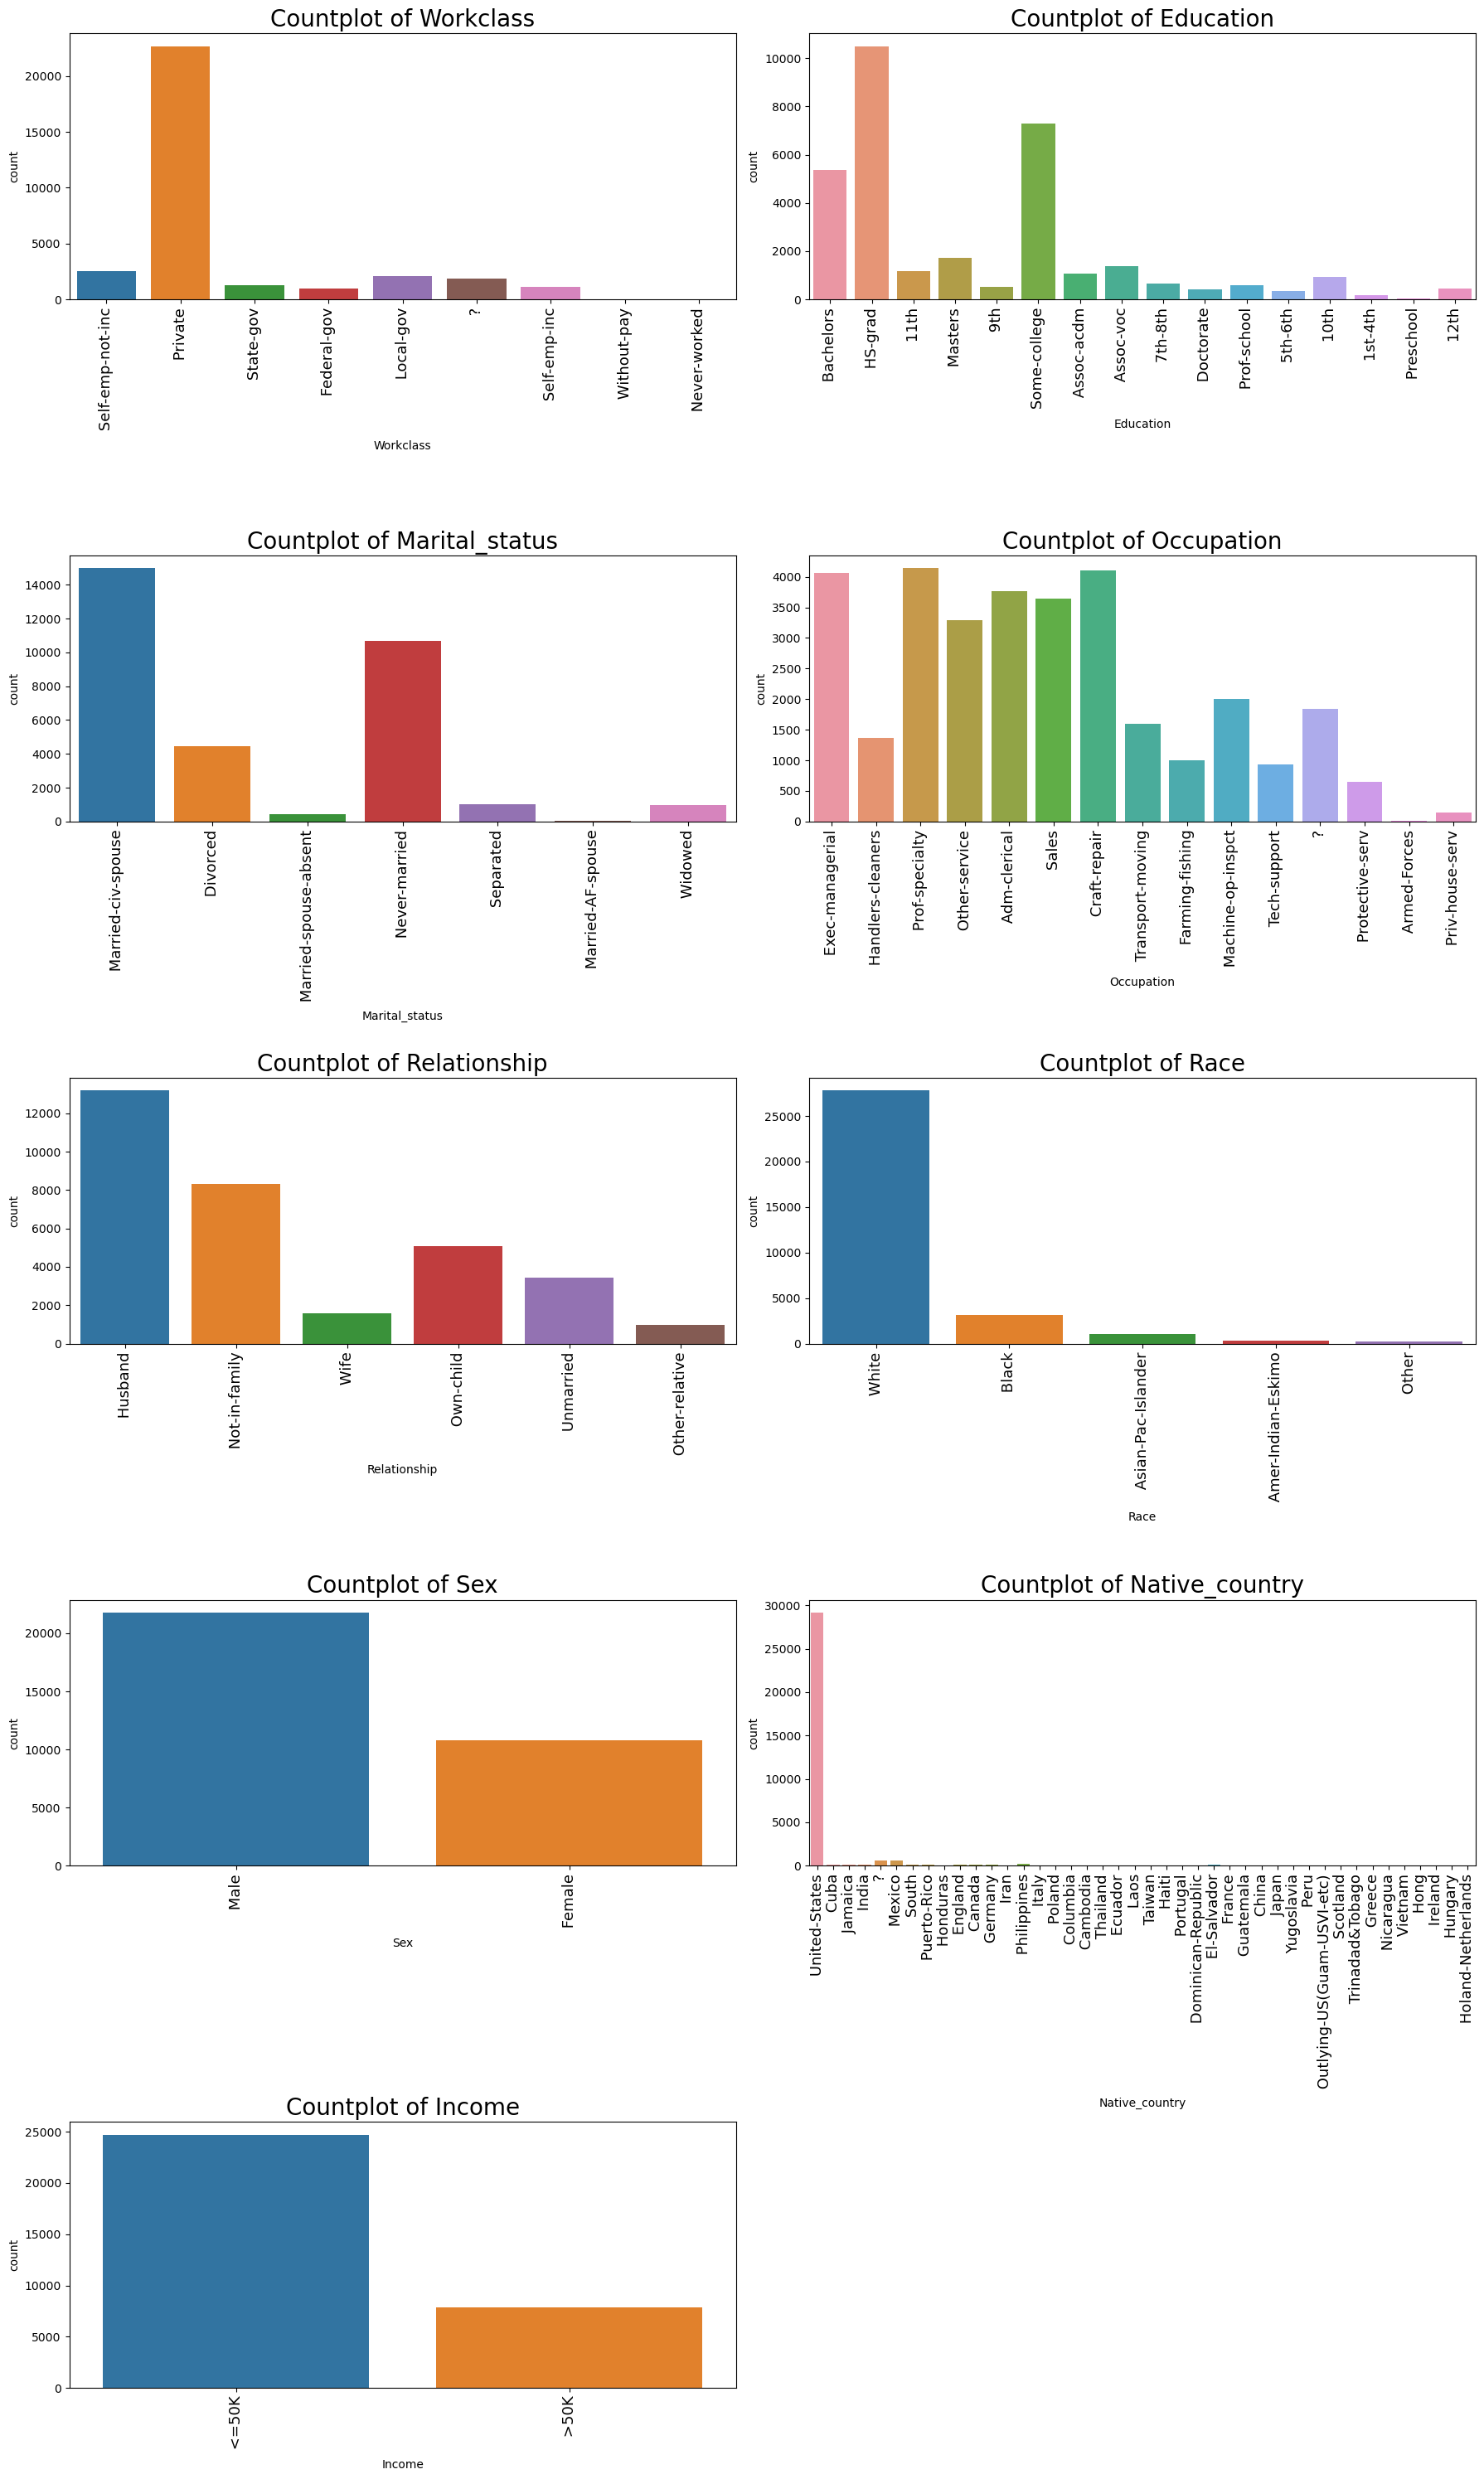

In [13]:
#Checking the count of categorical columns.
plt.figure(figsize=(18,30))
for i in range (len(categorical_col)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df[categorical_col[i]])
    plt.title(f"Countplot of {categorical_col[i]}",fontsize=20)
    plt.xticks(rotation=90,fontsize=13)
    plt.tight_layout()

- From above count plot visualization we can see 
1. Their are workclass column most of the people work in the private sector.

2. In Education column we can see there are more peoples who have did HS-Grad and very less people who have only did pre-school.

3. In Marital column we can see there are most of the people are ed-civ-spouse and very less of the people are Married-AF-spouse.

4. In Occupation column we can see there are more people worked as the Exec-managerial, Prof-specialty, and Craft-repair.

5. In Relationship column we can see there are most of are Husbands.
6. In Race column (define there color) we can see there are most of the White people are worked.

7. In Sex,Native_Country and Income columns we can there are most of the people are male, most of the people are belonged to the United-States and more peoples who have a salary of less then & equal to 50k.

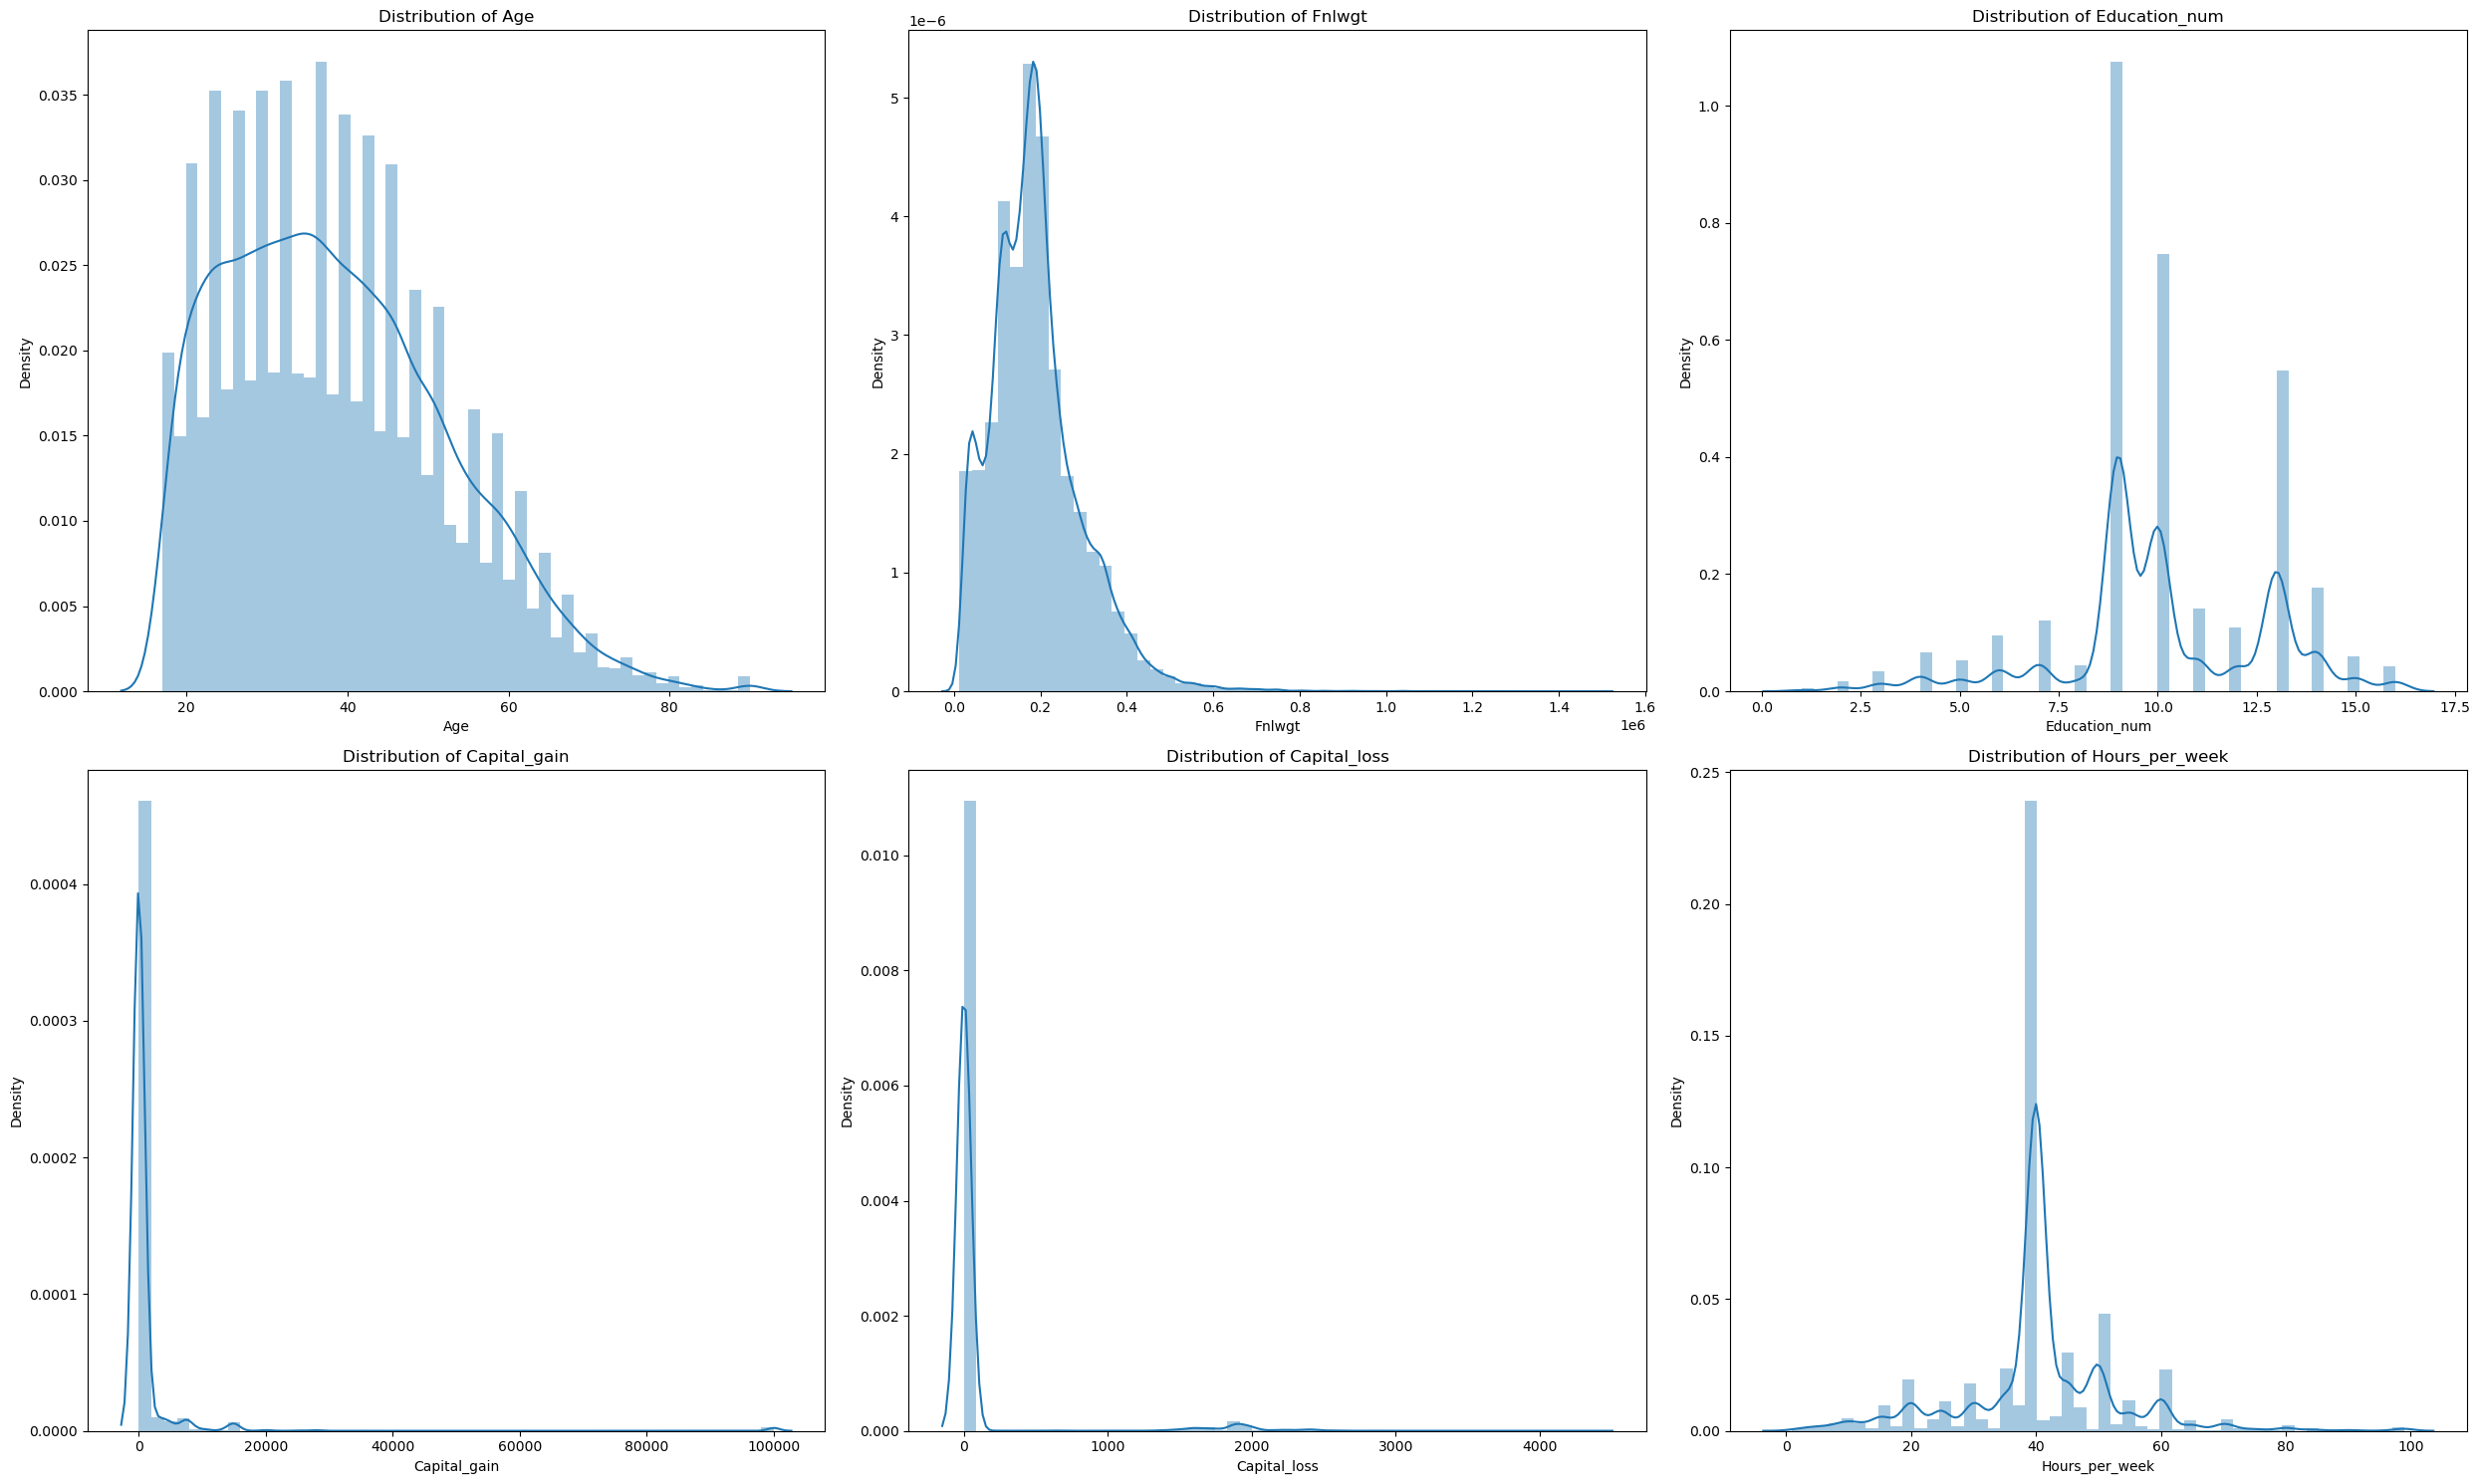

In [19]:
# Checking the distribution of numerical columns
plt.figure(figsize=(25,15))
for i in range(len(numerical_col)):
    plt.subplot(2,3,i+1)
    sns.distplot(df[numerical_col[i]])
    plt.title(f"Distribution of {numerical_col[i]}")
    plt.tight_layout()

- We observe that the distrubution of all numerical features but there are some columns that are discrete like age and hour per week so we only have to check our continuous column because if my continuous column is not normally distributed i have to transform it into normal distribution.

# Bivariate Analysis

In [20]:
Col1 = ['Age','Workclass','Fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country']

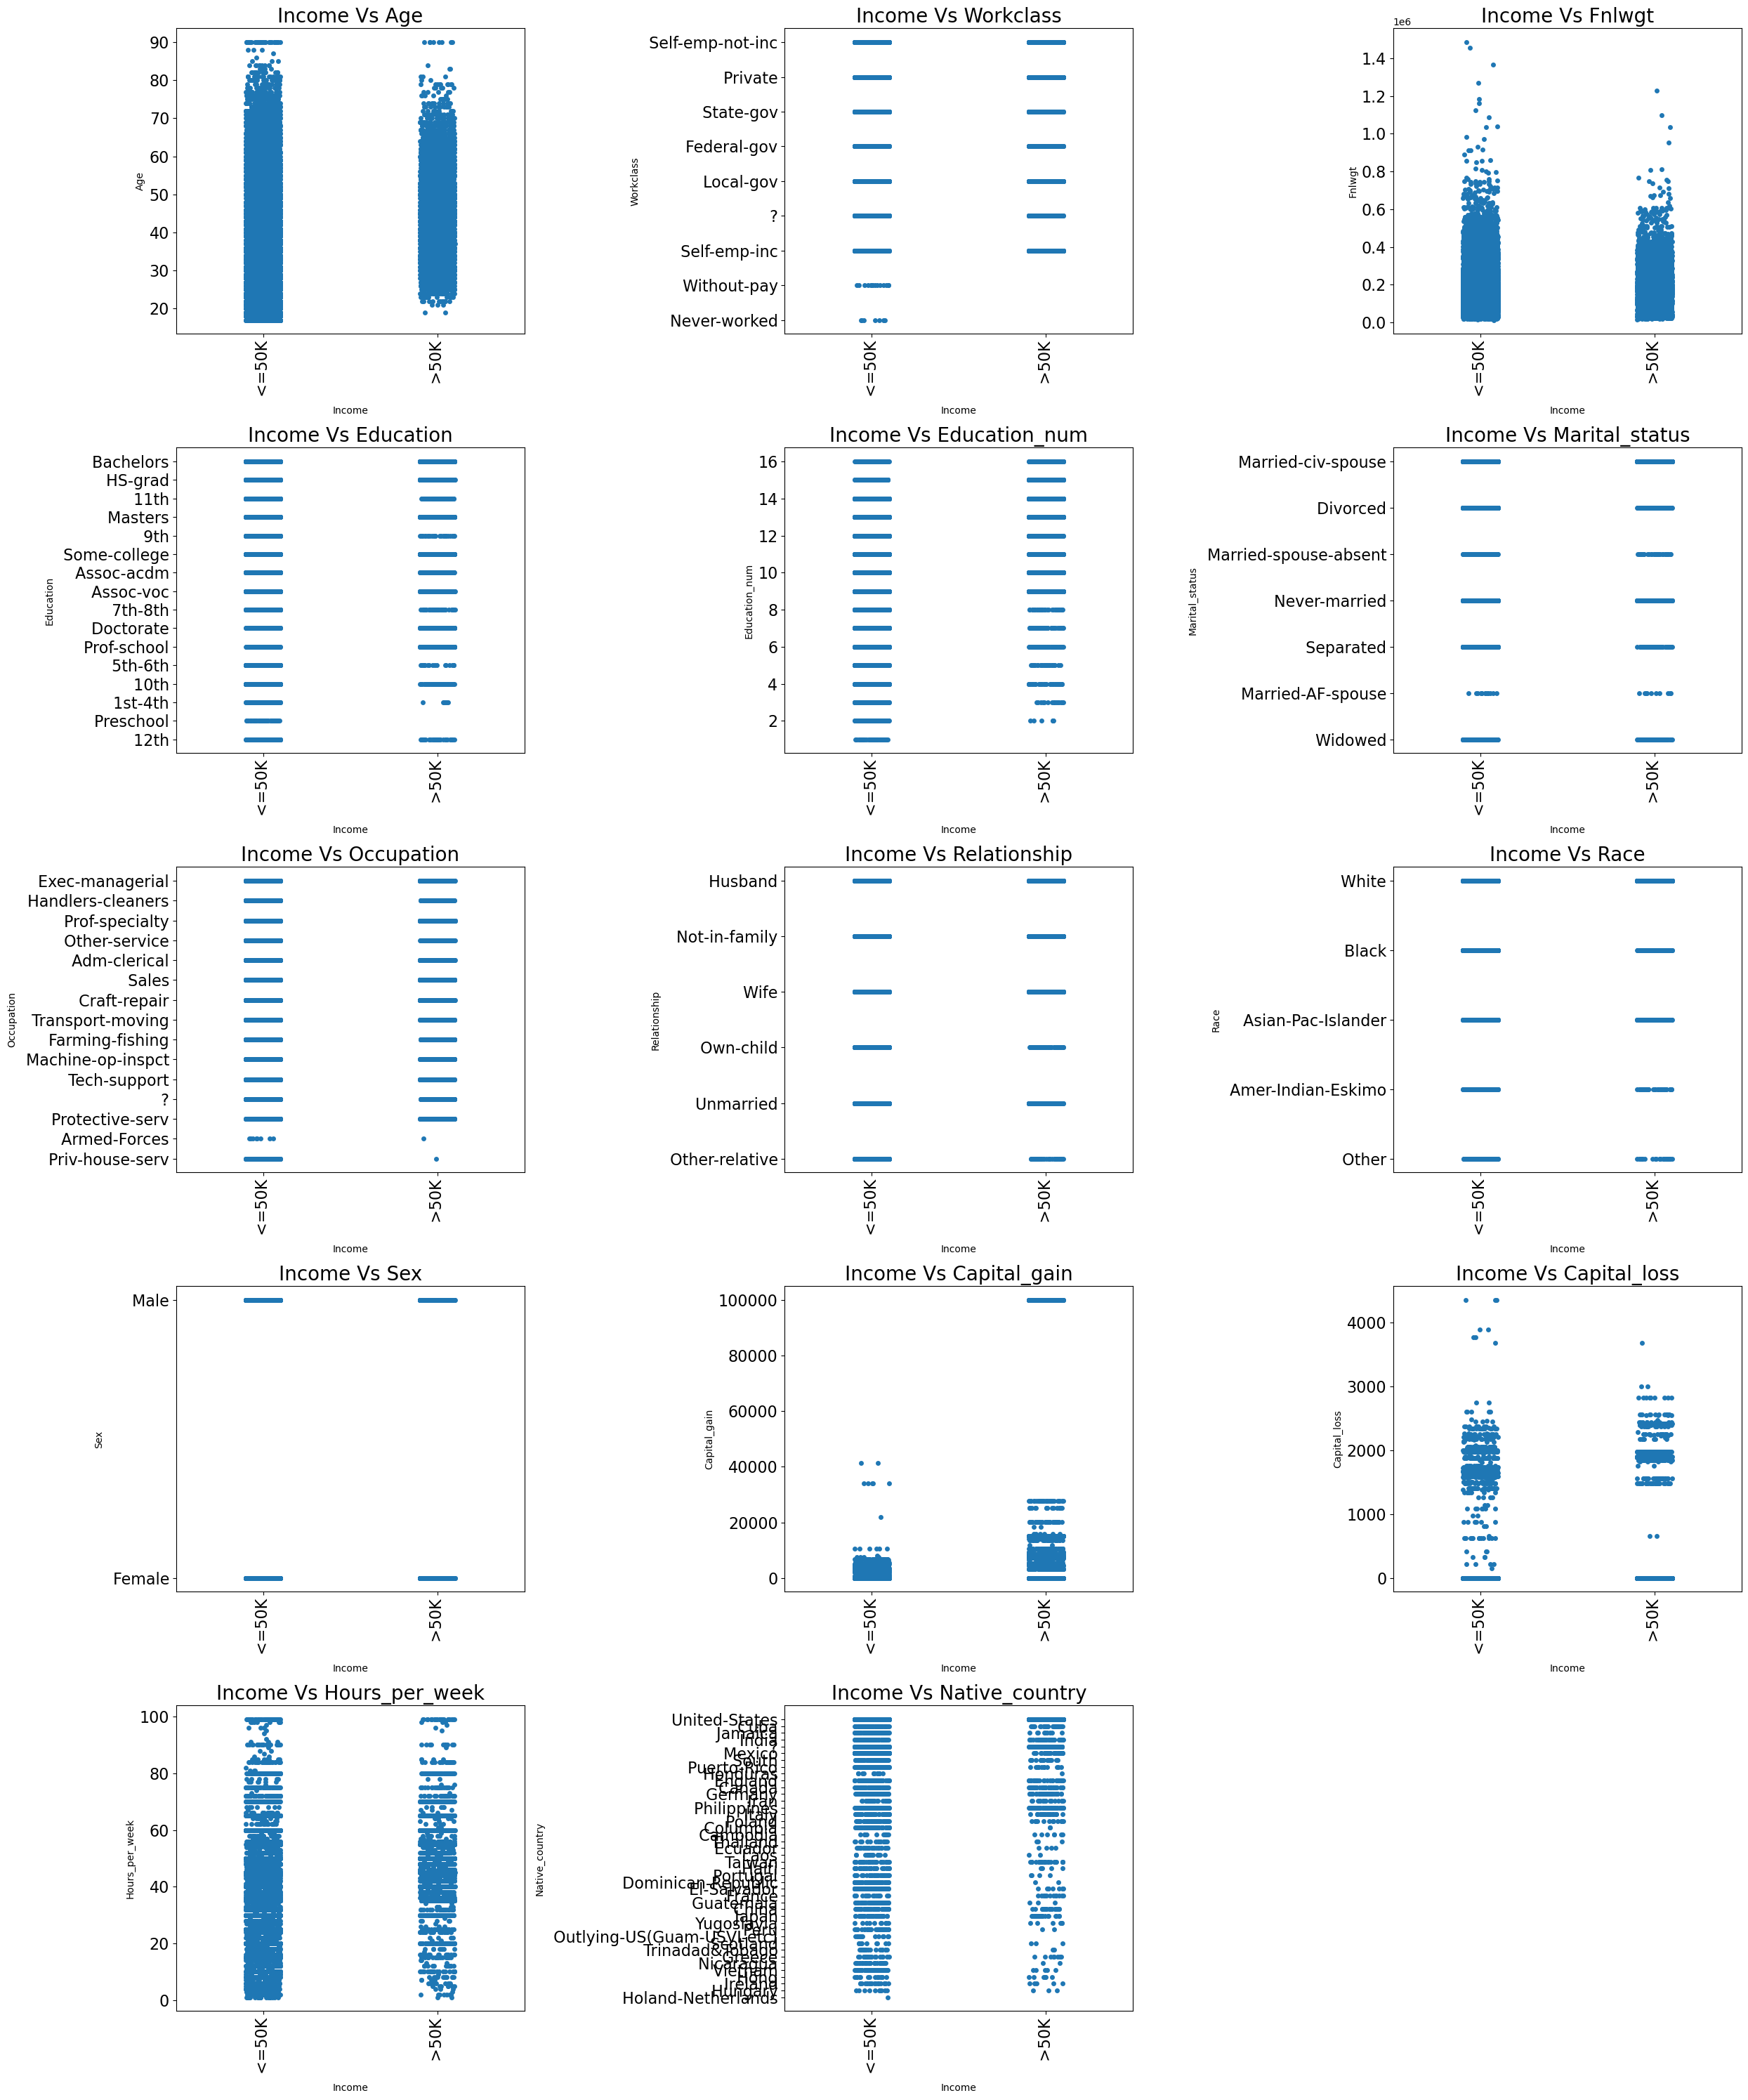

In [22]:
#Checking relation between The Income and all other features
plt.figure(figsize=(25,30))
for i in range(len(Col1)):
    plt.subplot(5,3,i+1)
    sns.stripplot(x=df['Income'],y=df[Col1[i]])
    plt.title(f"Income Vs {Col1[i]}",fontsize=20)
    plt.xticks(rotation=90,fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()

- So, We can observe that above the graph

1. From age I can say from 25-65 people have high chances to get more than 50k.

2. From workclass I can say except without pay and never worked other workclass have chances to earn more then 50k.

3. From education I can say as the education increase there are  more chances to earn more then 50k.

4. From marital status I can say except married AF Spouse all have chances to earn more then 50k.

5. From occuption I can say as the occupation increase there are more chances to earn more then 50k.

6. From relationship I can say there is no such effect of the relationship on  income same with Sex,

7. From capital gain I can say more the capital income more chances to earn more then 50k.

8. From capital loss I can say less the capital loss more the income.

9. For last two plot I plot them again to understand them.

10. People earning more then 50k income work mean hours per week greater than tose earning, <50k while people from both the categories work from min to max hours per week

11. The shows people belonging the different contries have less chances of earning more then 50k which is wrong , this is because np. of individuals belonging from other countries other than U.S are very low but it is to be noticed that there are more people in the category <50k than >50k

In [23]:
Col2=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income','Education_num']

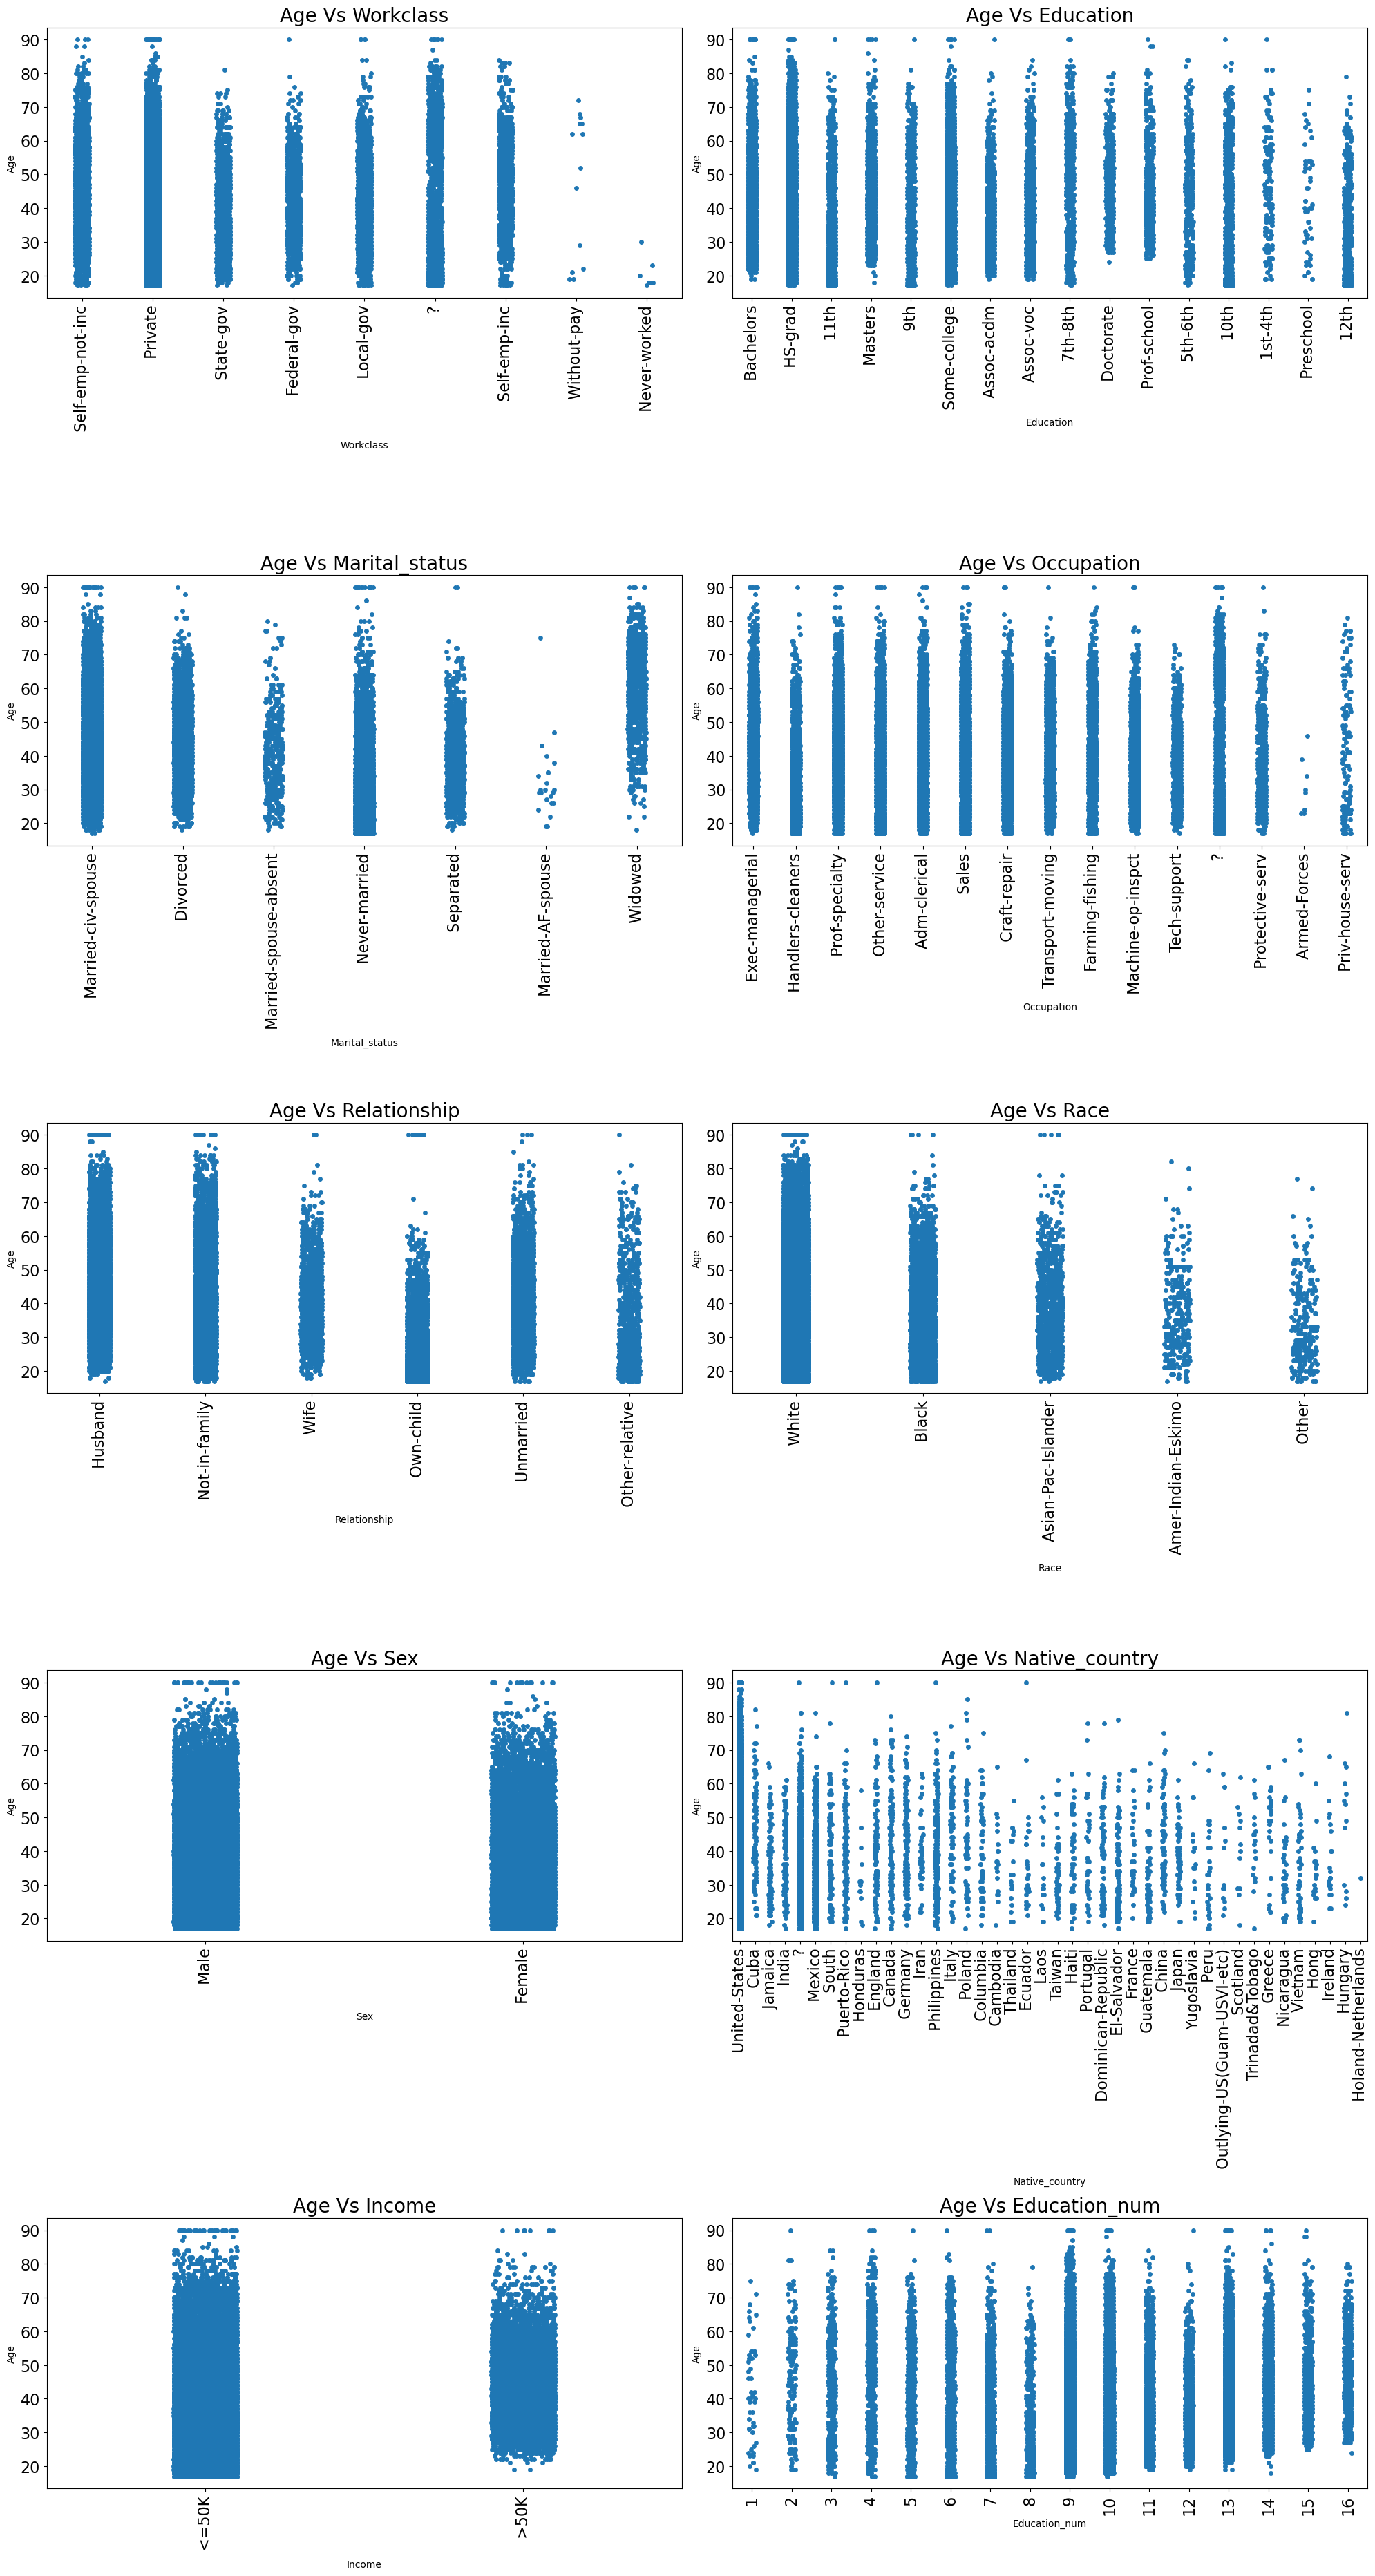

In [26]:
#Checking relation between the Age and all other features
plt.figure(figsize=(20,60))
for i in range(len(Col2)):
    plt.subplot(8,2,i+1)
    sns.stripplot(y=df['Age'],x=df[Col2[i]])
    plt.title(f"Age Vs {Col2[i]}",fontsize=20)
    plt.xticks(rotation=90,fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()

We above analysis observe are:-
 
1. Individuals working in the gov. sector have almost age 70 to 80 with few outliers which must be the retirement age for them,

2. There are no individual who do not work after age of 30.

3. There are no individuals of age>70 belonging to hte pre school education category while doctorates and professors appers from late 20's as they have to study for more years to get to that level of education.

4. Same is the case with education num, as the education number increase age also in increased.

5. There are no people after the  age of 50 in the married to armed forced category with just a few outliers.

6. Widowed category has seen incresed as the age seems to increase there are very few widows at an eary age.

7. There are more no. of working men at higher age than women.

8. Ther are very few people belonging from other countries with high age.

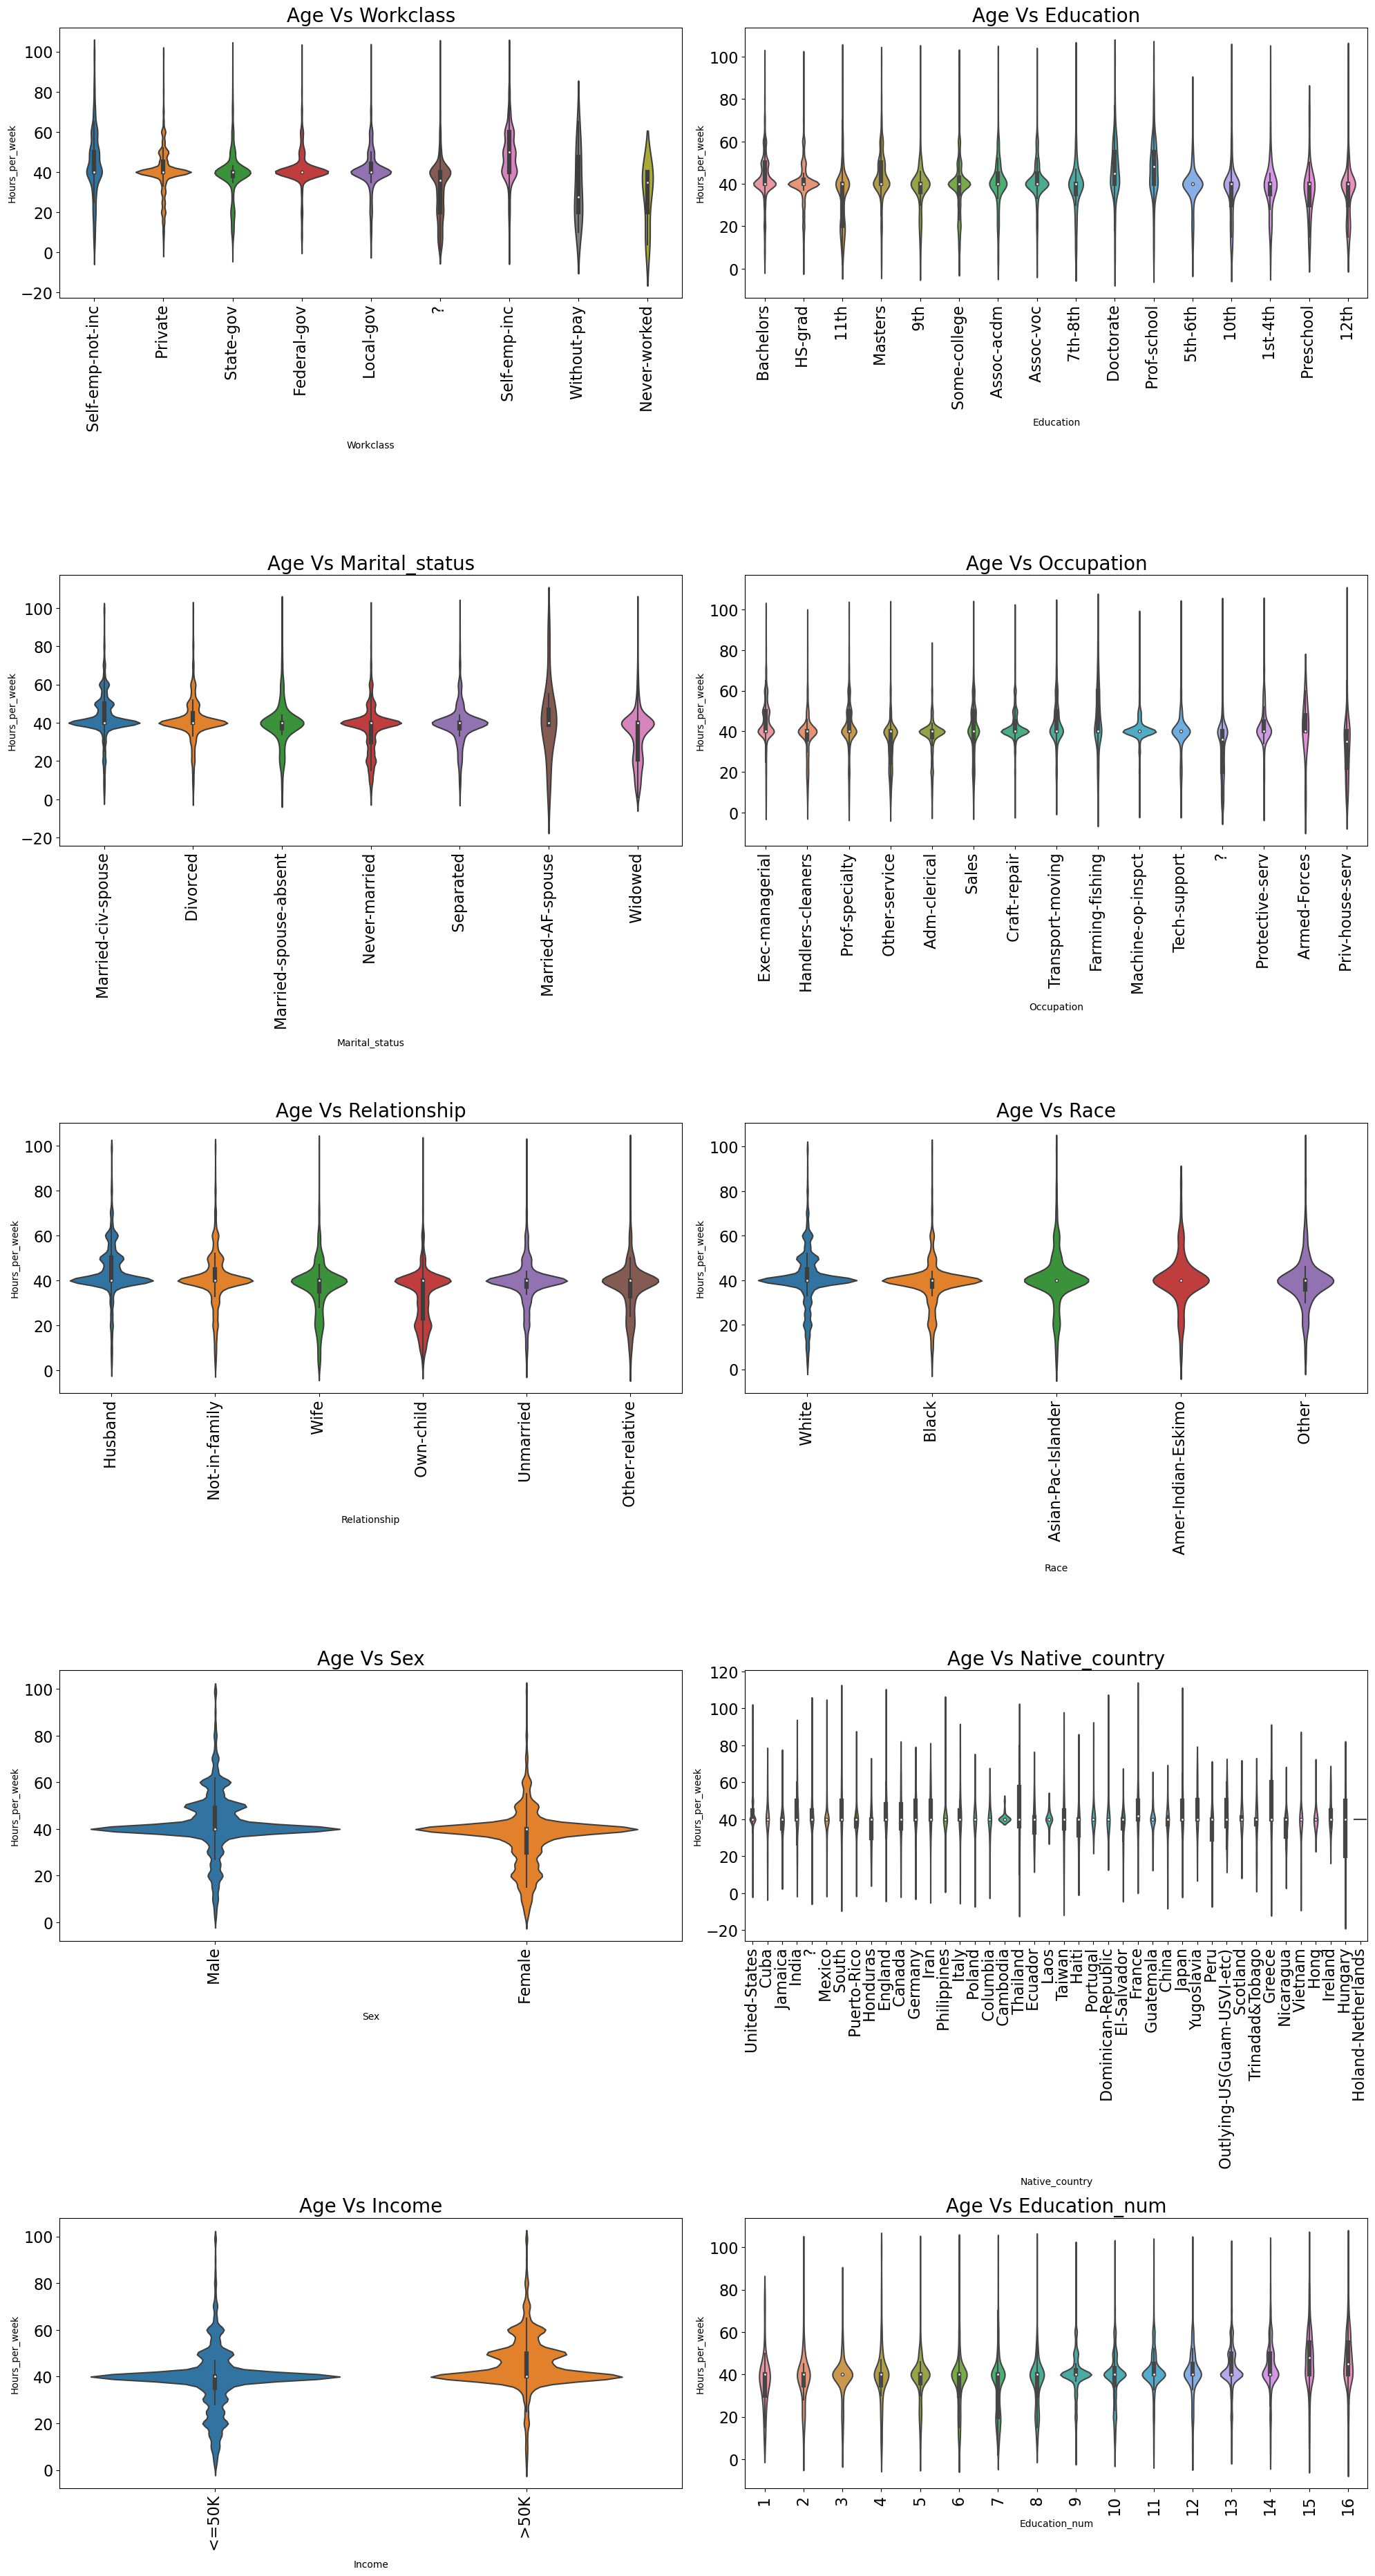

In [27]:
#Checking relation between the Hours_per_week and all the Features
plt.figure(figsize=(20,60))
for i in range(len(Col2)):
    plt.subplot(8,2,i+1)
    sns.violinplot(y=df['Hours_per_week'],x=df[Col2[i]])
    plt.title(f"Age Vs {Col2[i]}",fontsize=20)
    plt.xticks(rotation=90,fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()

We above graphs we observed that

1. Govt Employees do not work more than 80 hours a week that also with rare cases.

2. It is been seen that people with less education work more no. hours of the week which is logical.

3. No armed froce person works more than 60 hours a week while farmers and transposrt movers has working hours mean high than other occupation.

4. More no. of individuals who have a relationship as own child have high density for working only 20 hours a week.

5. Female  works for less no. of hours as compared to men's.

6. From relationship people who are husband work more as compare to others and who owned child they work less as compare to other.

7. From Race white people work more as compare to others.

8. From education people who are prof. and are doing doctorate work more no. of hours

Text(0.5, 1.0, 'Income Vs Work of Hours')

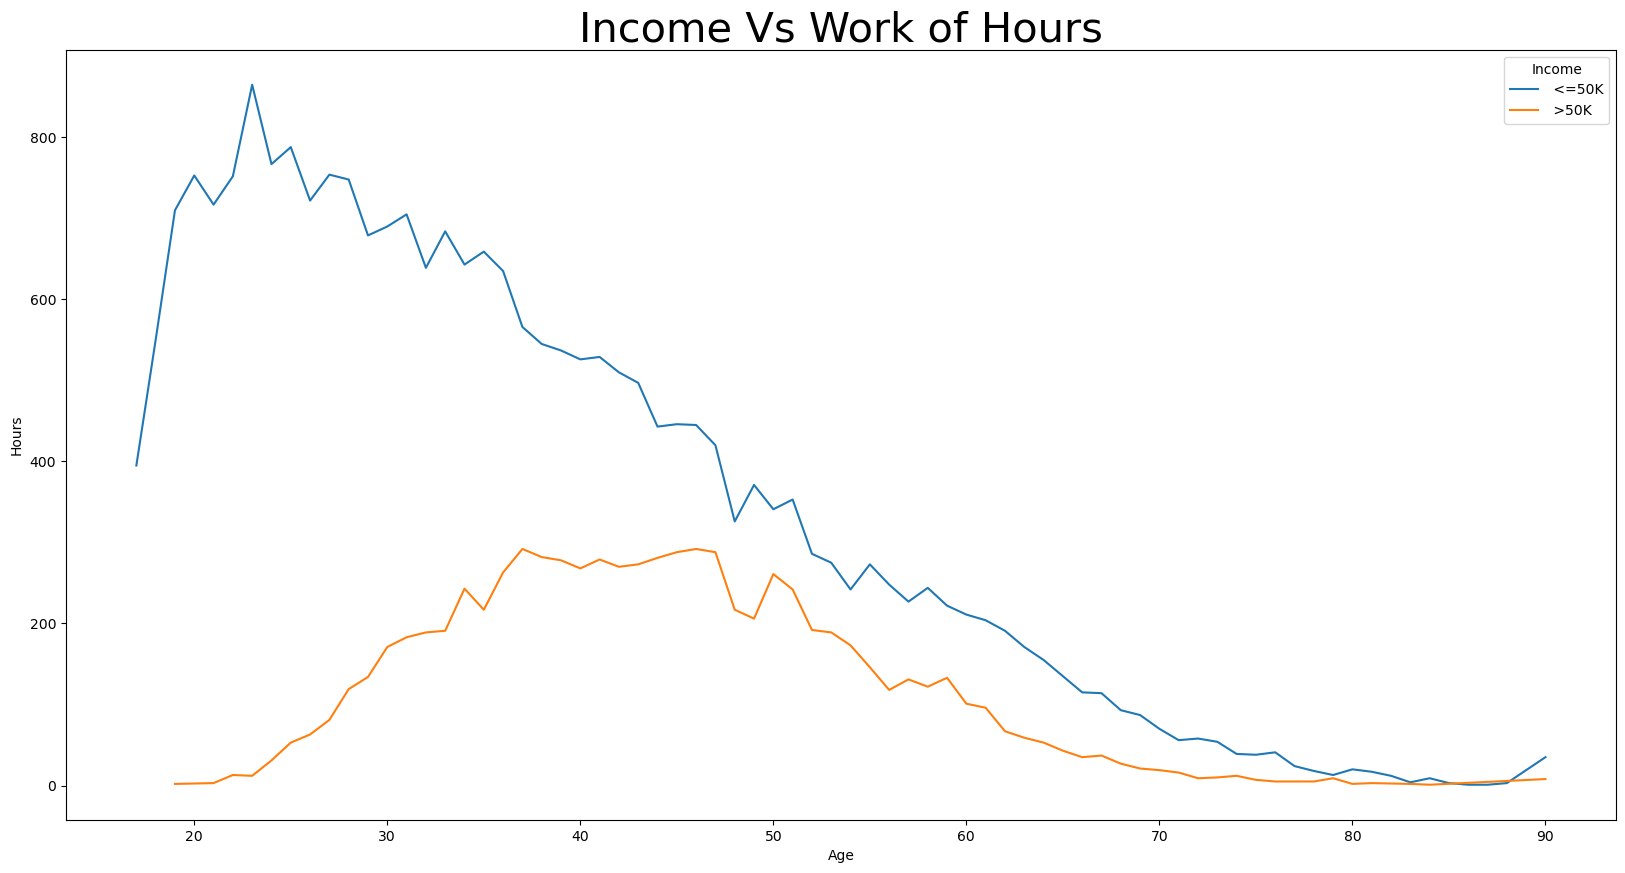

In [4]:
#Checking Income Vs Working of hours
d1=df.groupby(['Age','Income']).apply(lambda x:x['Hours_per_week'].count()).reset_index(name='Hours')
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='Hours',data=d1,hue='Income')
plt.title("Income Vs Work of Hours",fontsize=30)

- People who get salary <50k they work more and people who get salary >50k they work less as compared to other.

Text(0.5, 1.0, 'Income Vs Age')

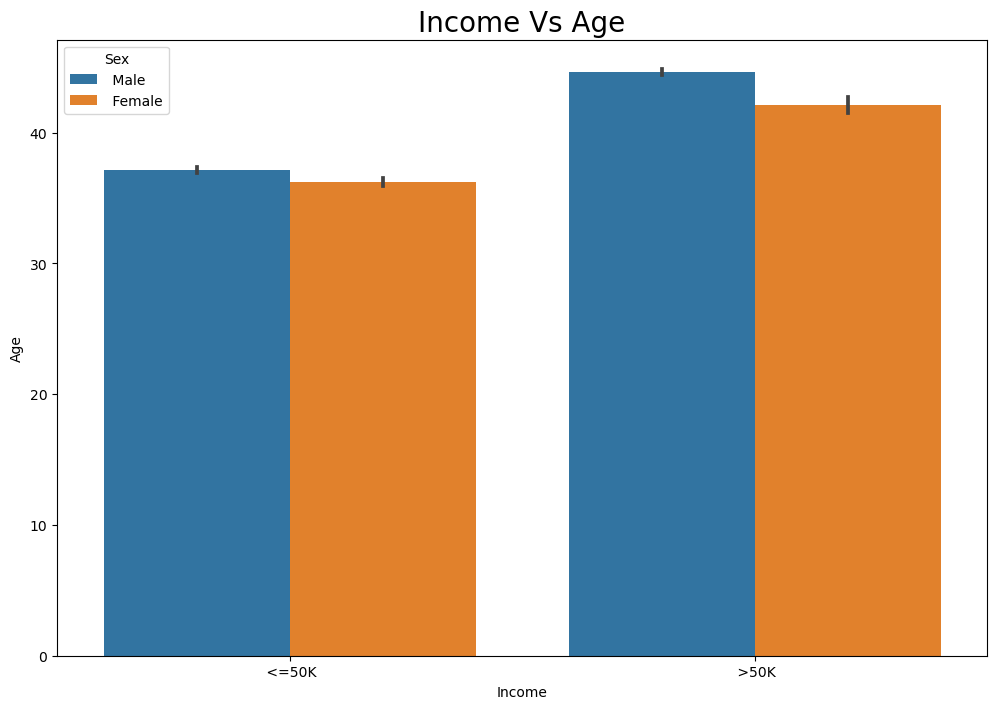

In [5]:
#Checking as the age increase of people will there salary also increasing or not
plt.figure(figsize=(12,8))
sns.barplot(x='Income',y='Age',data=df,hue='Sex')
plt.title("Income Vs Age",fontsize=20)

- As the age increase, people paid more but males paid more always as compared to females

<Axes: xlabel='Workclass', ylabel='Education_num'>

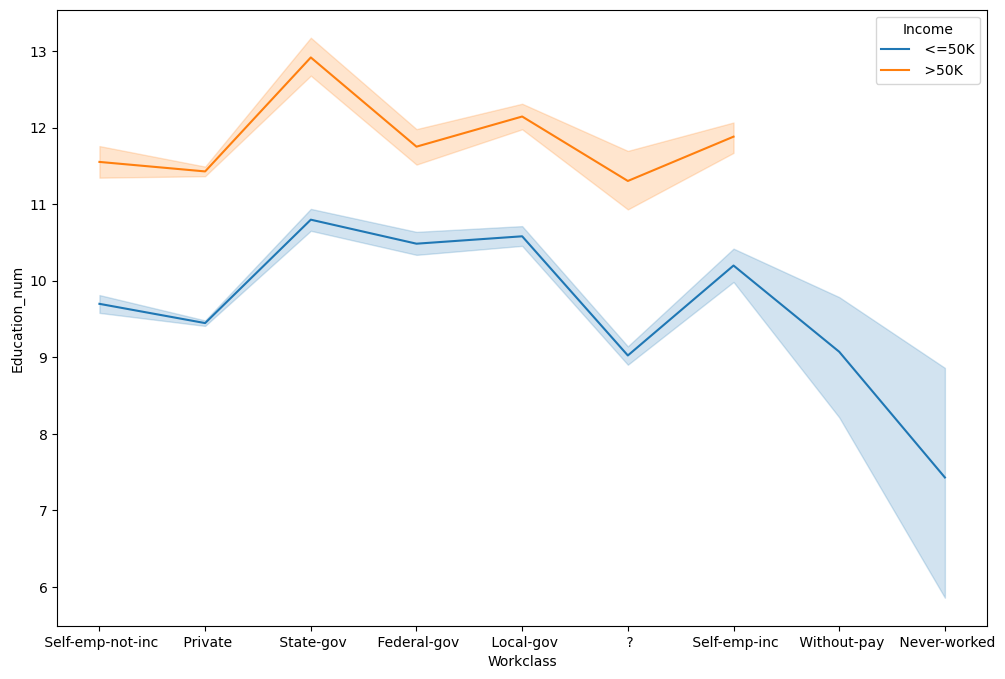

In [7]:
#Now Checking the education increased will the workclass and income also incerasing
plt.figure(figsize=(12,8))
sns.lineplot(x='Workclass',y='Education_num',hue='Income',data=df)

- Some people belonging to a particular workclass might have less education and some workclass might require more education level but no matter whether workclass, people in the same workclass, if they have higher education level they earn more. It is also to be noticed that there is no person from wihtout pay and never worked workclass category who earn more than 50k which is logical.

([0, 1, 2, 3, 4],
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

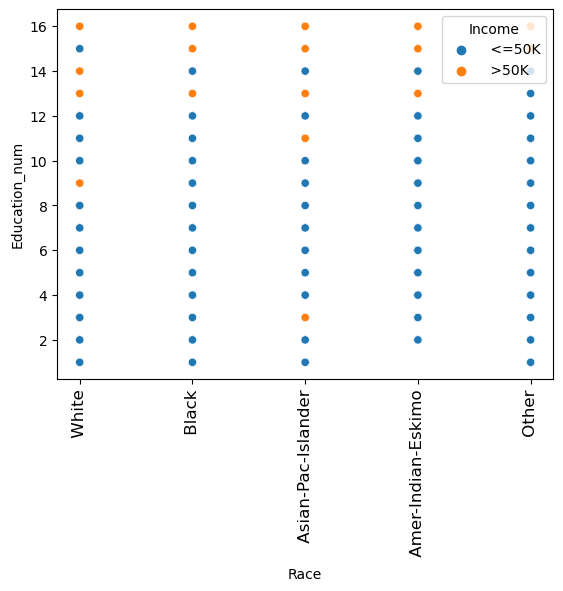

In [12]:
# Checking the race people are more educated and which are earning more
sns.scatterplot(x='Race',y='Education_num',hue='Income',data=df)
plt.xticks(rotation=90,fontsize=12)

Asian pacific race have comparatively more education than the fellows who earn same as much as they do, belonging to other races. Indians and some other races earns >50k with lowest education level.

# Machine Learning

# Feature Transformation

- Feature transformation is a very important step, our machine learning model don't understand the words it only understands numerical values so we have many techniques for doing feature transformation so we use each technique as per the situation like in this i am using OdinalEncoder and LabelEncoder

In [45]:
from sklearn.preprocessing import OrdinalEncoder
Oe =OrdinalEncoder()
def ordinal_encoder(df,column):
    df[column]=Oe.fit_transform(df[column])
    return df

In [46]:
data=ordinal_encoder(df,['Education','Income','Marital_status','Occupation','Race','Relationship','Sex','Workclass'])

- I am Converting all these columns as per order because all of these columns have values in order and have less unique values.

# Preprocessing

- In this preprocessing i am converting one categorical feature with help of LabelEncoder because it has many unique values and also splitting my data into two part one is X which have all the independent variable and other is Y which has the dependent variable.

In [47]:
from sklearn.preprocessing import LabelEncoder
def preprocessing(df):
    df=df.copy()
    LE=LabelEncoder()
    df['Native_contry']=LE.fit_tranform(df['Native_country'])
    x=df.drop(columns=['Income'])
    y=df['Income']
    return x,y

- Preprocessing function which will return me x and y value

# Checking Multicollinearity

In [44]:
x_corr=x.corr()
plt.figure(figsize=(12,8))
sns.heatmap(x_corr,annot=True)

ValueError: could not convert string to float: ' Self-emp-not-inc'